     X   Y  Class
id               
1   56  82      1
2   96  36      0
3   78  73      1
4   69  19      1
5   12  44      1
6   77  32      0
7   55  38      1
8   86  95      1
9   46  99      1
10  15  83      0


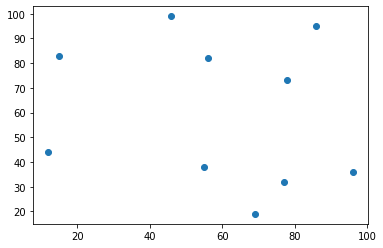

Евклидова метрика 
 Расстояние до ближайшего объекта:  [[11.18  29.428 40.804]]
Три ближайших соседа:  [[10  9  1]]
Класс для нового объекта:  [1] 

Манхэттенское расстояние 
 Расстояние до ближайшего объекта:  [[13. 34. 51.]]
Три ближайших соседа:  [[10  9  1]]
Класс для нового объекта:  [1]


In [121]:
from pandas import Series, DataFrame
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('k-NN_example.csv', delimiter=',', decimal='.', index_col = 0) #Открываем исходные данные
print(data)

plt.scatter(data.X, data.Y)
plt.show()

x = np.array(data.drop(columns=['Class'])) #Предикторы
y = np.array(data.Class) #Ожидаемые значения

neigh = NearestNeighbors(n_neighbors=3, p=2) 
neigh.fit(x)

New_point = neigh.kneighbors([[17, 94]])
print('Евклидова метрика \n Расстояние до ближайшего объекта: ', np.around(New_point[0], decimals=3))
print('Три ближайших соседа: ', New_point[1]+1) #Прибавляем единицу, так как в sk идентификаторы начинаются с 0

model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(x, y)

print('Класс для нового объекта: ', model.predict([[17, 94]]), '\n')

neigh = NearestNeighbors(n_neighbors=3, p=1) 
neigh.fit(x)
New_point = neigh.kneighbors([[17, 94]])
print('Манхэттенское расстояние \n Расстояние до ближайшего объекта: ', np.around(New_point[0], decimals=3))
print('Три ближайших соседа: ', New_point[1]+1)

model = KNeighborsClassifier(n_neighbors=3, p=1)
model.fit(x, y)

print('Класс для нового объекта: ', model.predict([[17, 94]]))
